# QCTO - Workplace Module

### Project Title: Predictive Modeling for Insurance Claims 
#### Done By: Onkabetse Seboea

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
# Load the Excel file using openpyxl engine
insure = pd.read_excel('insurance_claims_raw.xlsx', engine='openpyxl')

In [4]:
# Display the DataFrame
insure.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [5]:
# Checking the basic statistics for numerical columns (five-number summary)
five_number_summary = insure.describe().T
five_number_summary

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.75,199.50,276.25,479.00
age,998.0,3.896293e+01,9.135425e+00,19.00,32.00,38.00,44.00,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.25,533135.00,759099.75,999435.00
policy_deductable,998.0,1.134269e+03,6.112519e+02,500.00,500.00,1000.00,2000.00,2000.00
policy_annual_premium,997.0,1.257001e+03,2.442651e+02,433.33,1090.32,1257.83,1415.74,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.00,0.00,0.00,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.50,466445.50,603251.00,620962.00
capital-gains,998.0,2.517645e+04,2.787738e+04,0.00,0.00,0.00,51075.00,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.00,-23250.00,0.00,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.00,12.00,17.00,23.00


Some columns, such as umbrella_limit, show extreme ranges, suggesting potential outliers.

In [6]:
# Identifying missing data in each column
missing_data = insure.isnull().sum()
missing_data

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# Combining both summaries for a consolidated view
data_overview = pd.DataFrame({
    "Count": insure.count(),
    "Missing": missing_data,
    "Min": five_number_summary["min"],
    "25%": five_number_summary["25%"],
    "Median (50%)": five_number_summary["50%"],
    "75%": five_number_summary["75%"],
    "Max": five_number_summary["max"]
}).fillna("N/A")

In [8]:
# Displaying the overview of the dataset
data_overview.sort_values(by="Missing", ascending=False)

,Count,Missing,Min,25%,Median (50%),75%,Max
_c39,0,1000,N/A,N/A,N/A,N/A,N/A
total_claim_amount,996,4,100,41812.5,57935,70620,114920
policy_annual_premium,997,3,433.33,1090.32,1257.83,1415.74,2047.59
capital-gains,998,2,0,0,0,51075,100500
policy_deductable,998,2,500,500,1000,2000,2000
age,998,2,19,32,38,44,64
incident_state,998,2,N/A,N/A,N/A,N/A,N/A
insured_hobbies,998,2,N/A,N/A,N/A,N/A,N/A
authorities_contacted,998,2,N/A,N/A,N/A,N/A,N/A
injury_claim,999,1,0,4290,6780,11310,21450


Missing data:
column (_c39) is entirely missing and may need to be dropped.
Columns like total_claim_amount, policy_annual_premium, capital-gains, and others have missing values requiring imputation or removal.

In [9]:
# Function to identify outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [10]:
# Analyze selected columns for outliers
columns_to_check = ['total_claim_amount', 'policy_annual_premium', 'capital-gains', 'umbrella_limit']
outlier_results = {}

for col in columns_to_check:
    outliers, lower, upper = detect_outliers_iqr(insure, col)
    outlier_results[col] = {
        "Outlier Count": len(outliers),
        "Lower Bound": lower,
        "Upper Bound": upper
    }

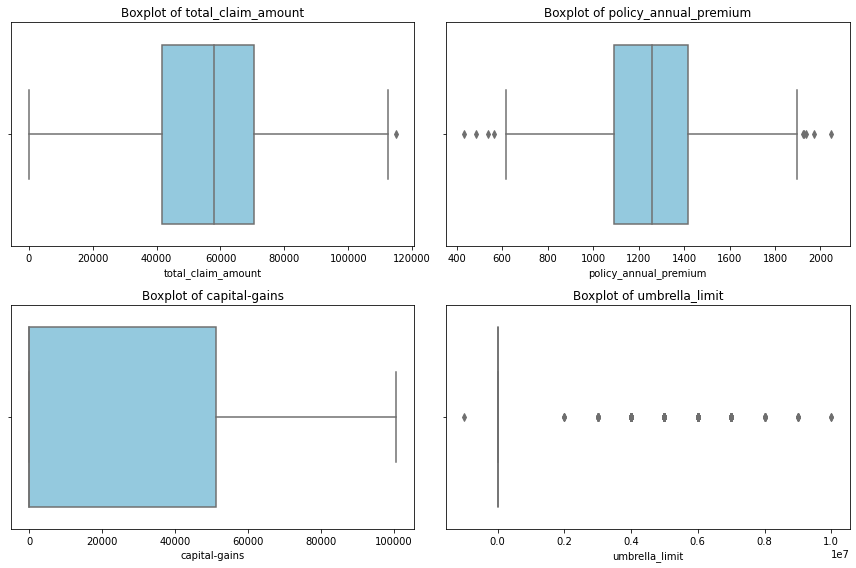

In [11]:
# Visualize outliers for these columns using boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=insure[col], color='skyblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [12]:
# Displaying outlier summary results
pd.DataFrame(outlier_results).T

,Outlier Count,Lower Bound,Upper Bound
total_claim_amount,1.0,-1398.75,113831.25
policy_annual_premium,9.0,602.19,1903.87
capital-gains,0.0,-76612.50,127687.50
umbrella_limit,202.0,0.00,0.00


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [2]:
#Please use code cells to code in and do not forget to comment your code.

### Histograms 

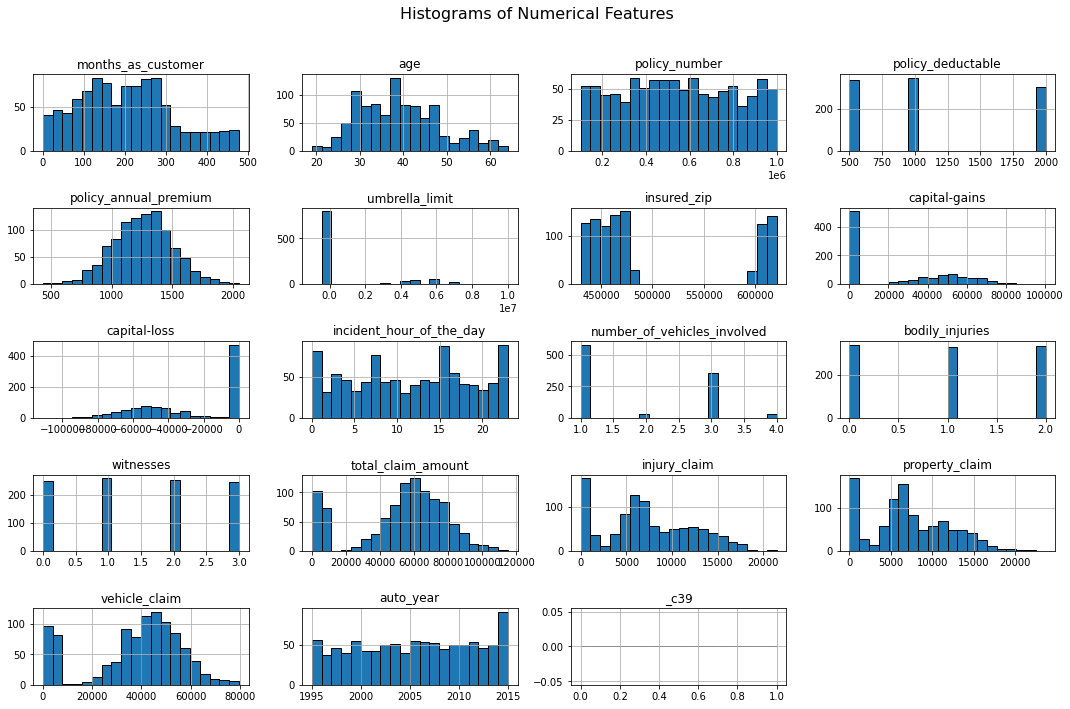

In [13]:
# Plot histograms for all numerical columns
insure.select_dtypes(include='number').hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Scatter Plots 

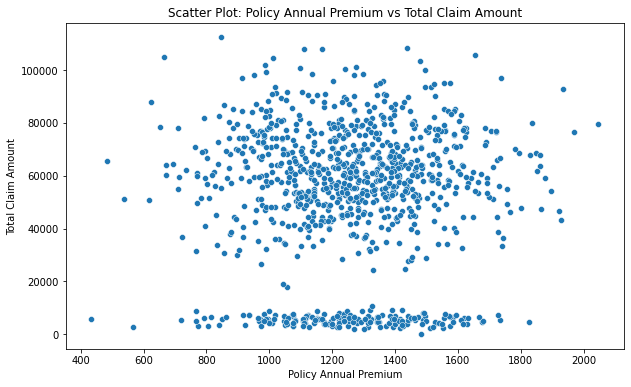

In [14]:
# Scatter plot for two selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', data=insure)
plt.title('Scatter Plot: Policy Annual Premium vs Total Claim Amount')
plt.xlabel('Policy Annual Premium')
plt.ylabel('Total Claim Amount')
plt.show()

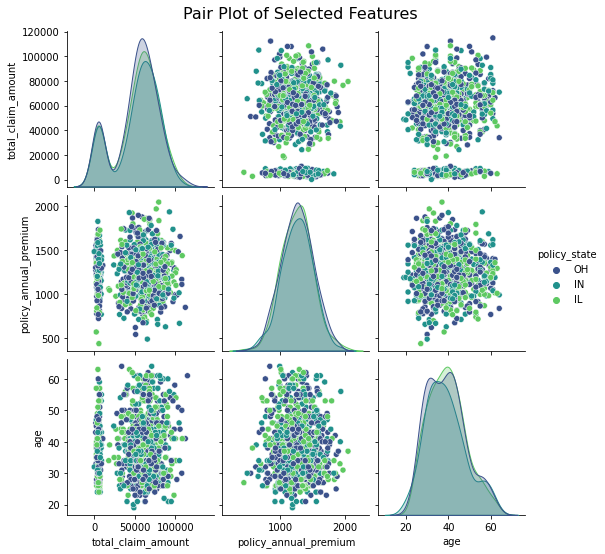

In [15]:
# Pair plot for a subset of numerical columns
sns.pairplot(insure, vars=['total_claim_amount', 'policy_annual_premium', 'age'], hue='policy_state', palette='viridis')
plt.suptitle('Pair Plot of Selected Features', fontsize=16, y=1.02)
plt.show()

### Fraud Detection Analysis

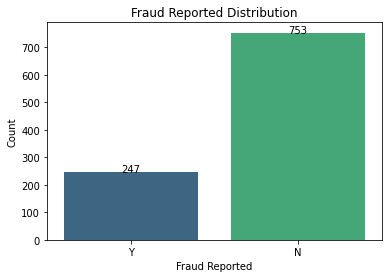

In [17]:
# Count plot for fraud cases
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='fraud_reported', data=insure, palette='viridis')
plt.title('Fraud Reported Distribution')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

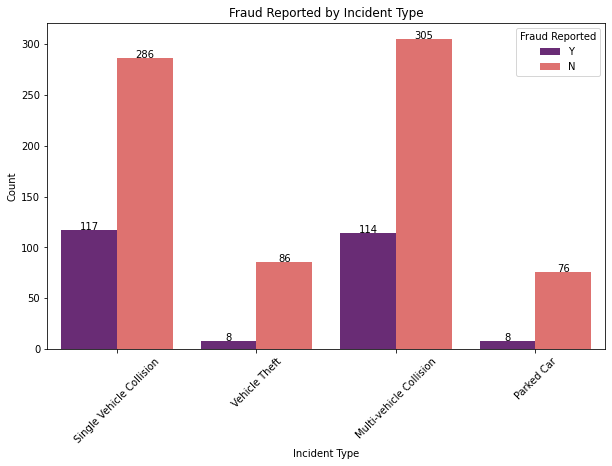

In [19]:
# Analyze fraud by incident type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='incident_type', hue='fraud_reported', data=insure, palette='magma')
plt.title('Fraud Reported by Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.xticks(rotation=45)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

### Seasonality and Timing Patterns 

In [20]:
# Extract month from incident_date
insure['incident_month'] = pd.to_datetime(insure['incident_date']).dt.month

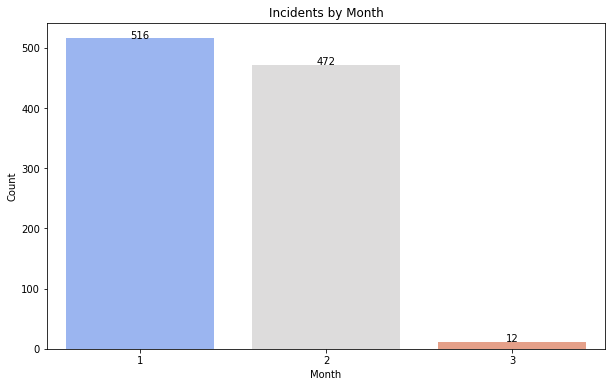

In [22]:
# Plot incidents by month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='incident_month', data=insure, palette='coolwarm')
plt.title('Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

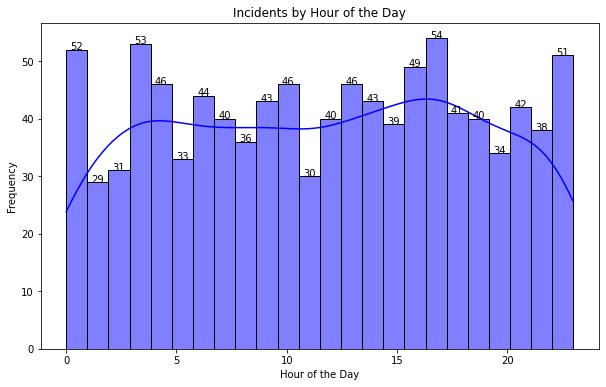

In [24]:
# Incident time of day
plt.figure(figsize=(10, 6))
ax = sns.histplot(insure['incident_hour_of_the_day'], bins=24, kde=True, color='blue')
plt.title('Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

### Demographic Insights 

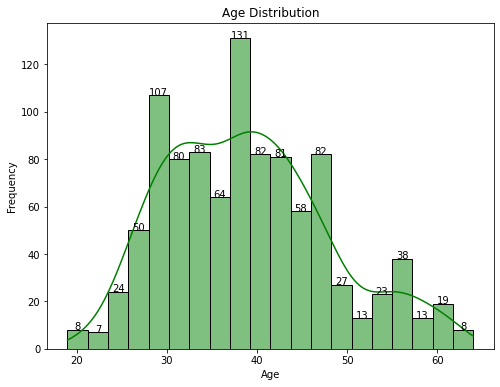

In [26]:
# Age distribution
plt.figure(figsize=(8, 6))
ax = sns.histplot(insure['age'], kde=True, bins=20, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

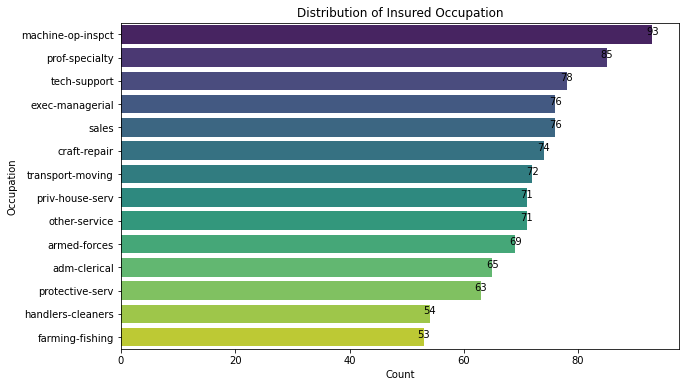

In [29]:
# Insured occupation distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='insured_occupation', data=insure, palette='viridis', order=insure['insured_occupation'].value_counts().index)
plt.title('Distribution of Insured Occupation')
plt.ylabel('Occupation')
plt.xlabel('Count')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='baseline')

plt.show()

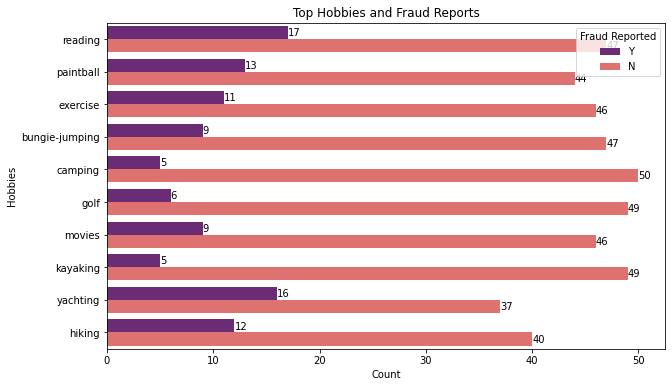

In [31]:
# Insured hobbies and fraud
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='insured_hobbies', hue='fraud_reported', data=insure, palette='magma', order=insure['insured_hobbies'].value_counts().index[:10])
plt.title('Top Hobbies and Fraud Reports')
plt.xlabel('Count')
plt.ylabel('Hobbies')
plt.legend(title='Fraud Reported', loc='upper right')

# Add counts on the sides of bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.show()

### Geographical Trends

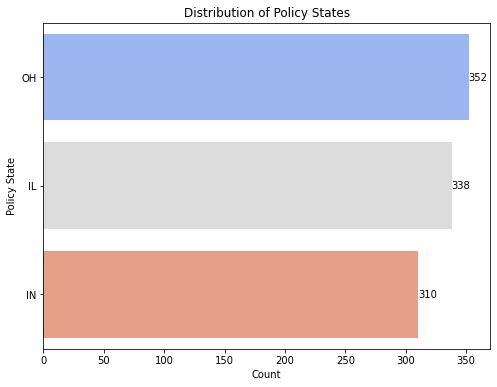

In [33]:
# Policy state distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='policy_state', data=insure, palette='coolwarm', order=insure['policy_state'].value_counts().index)
plt.title('Distribution of Policy States')
plt.ylabel('Policy State')
plt.xlabel('Count')

# Add counts on the sides of bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.show()

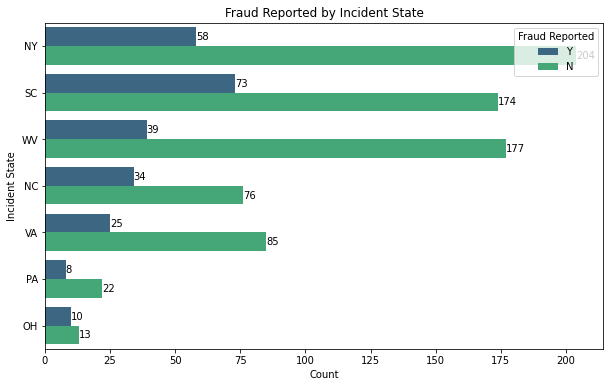

In [35]:
# Fraud reported by incident state
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='incident_state', hue='fraud_reported', data=insure, palette='viridis', order=insure['incident_state'].value_counts().index)
plt.title('Fraud Reported by Incident State')
plt.ylabel('Incident State')
plt.xlabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')

# Add counts on the sides of bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.show()

### Claim Amount Drivers  

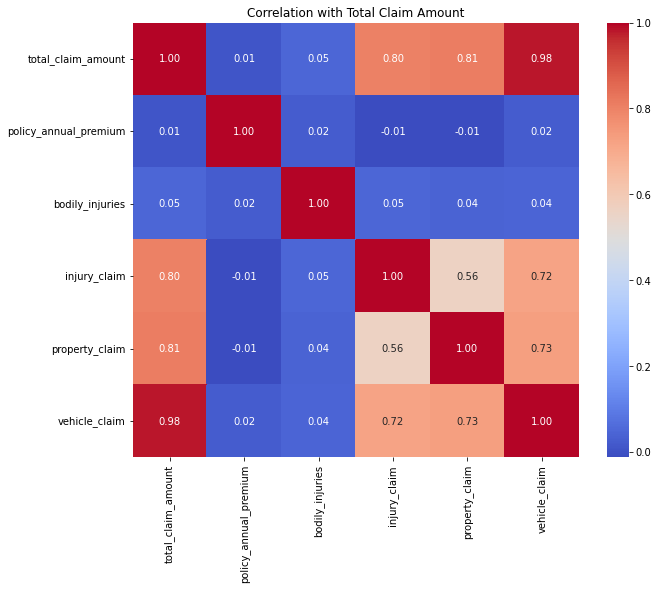

In [36]:
# Correlation with total claim amount
corr = insure[['total_claim_amount', 'policy_annual_premium', 'bodily_injuries', 'injury_claim', 'property_claim', 'vehicle_claim']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Total Claim Amount')
plt.show()

### Gender-Based Trends in Claims

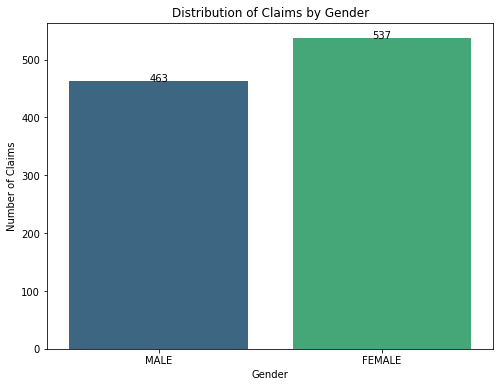

In [6]:
# Claims distribution by gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='insured_sex', data=insure, palette='viridis')
plt.title('Distribution of Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Claims')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

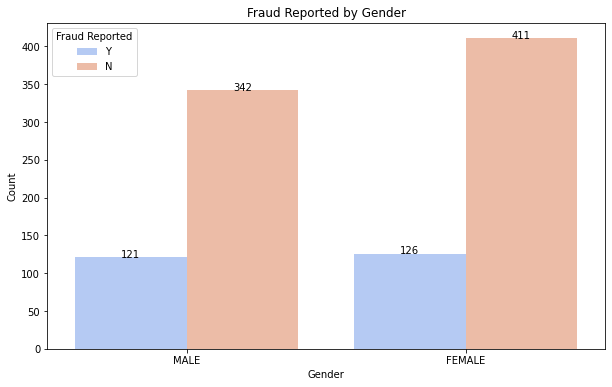

In [13]:
# Gender and fraud relationship
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='insured_sex', hue='fraud_reported', data=insure, palette='coolwarm')
plt.title('Fraud Reported by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper left')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

### Vehicle Type Analysis 

In [14]:
# Most common vehicle makes
top_makes = insure['auto_make'].value_counts().head(10)

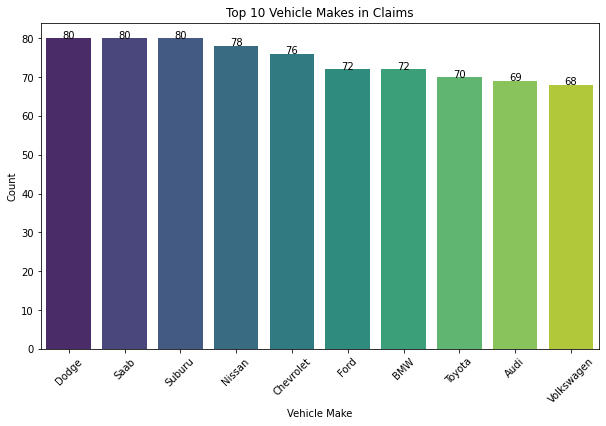

In [16]:
# Plot top 10 vehicle makes in claims
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Vehicle Makes in Claims')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

In [17]:
# Vehicle make and fraud relationship
top_makes_fraud = insure[insure['auto_make'].isin(top_makes.index)]

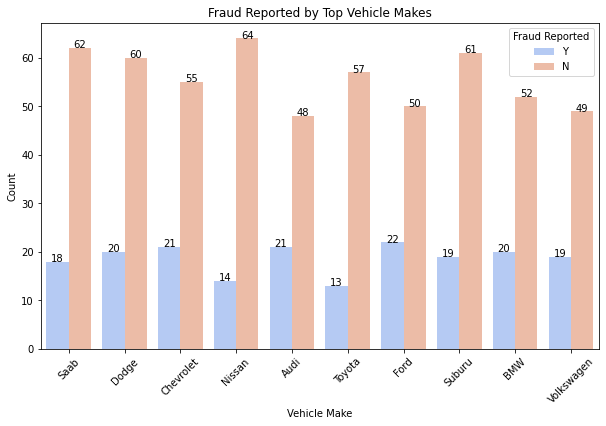

In [19]:
# Plot fraud reported by top vehicle makes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='auto_make', hue='fraud_reported', data=top_makes_fraud, palette='coolwarm')
plt.title('Fraud Reported by Top Vehicle Makes')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.xticks(rotation=45)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

### Combined Gender and Vehicle Type

<Figure size 864x432 with 0 Axes>

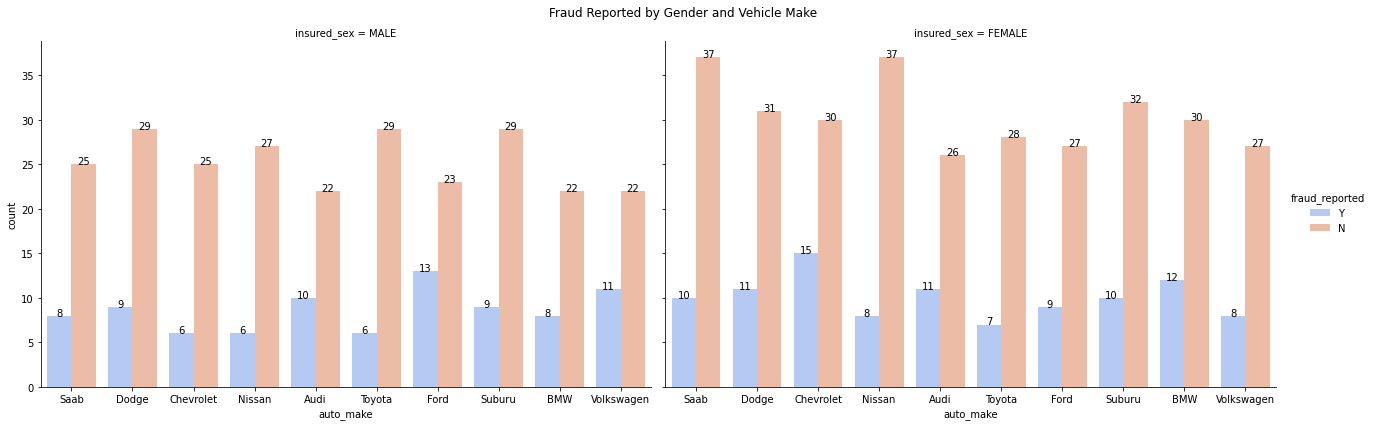

In [22]:
# Plot fraud reported by gender and vehicle make
plt.figure(figsize=(12, 6))
g = sns.catplot(x='auto_make', hue='fraud_reported', col='insured_sex', data=top_makes_fraud, kind='count', palette='coolwarm', height=6, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Fraud Reported by Gender and Vehicle Make')

# Add counts on top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
